## Song Embeddings - Skipgram Recommender

In this notebook, we'll use human-made music playlists to learn song embeddings. We'll treat a playlist as if it's a sentence and the songs it contains as words. We feed that to the word2vec algorithm which then learns embeddings for every song we have. These embeddings can then be used to recommend similar songs. This technique is used by Spotify, AirBnB, Alibaba, and others. It accounts for a vast portion of their user activity, user media consumption, and/or sales (in the case of Alibaba).

The [dataset we'll use](https://www.cs.cornell.edu/~shuochen/lme/data_page.html) was collected by Shuo Chen from Cornell University. The dataset contains playlists from hundreds of radio stations from around the US.

## Importing packages and dataset

In [3]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from urllib import request
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

The playlist dataset is a text file where every line represents a playlist. That playlist is basically a series of song IDs.

In [4]:
# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]



The `playlists` variable now contains a python list. Each item in this list is a playlist containing song ids. We can look at the first two playlists here:

In [5]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

## Training the Word2Vec Model
Our dataset is now in the shape the the Word2Vec model expects as input. We pass the dataset to the model.

In [6]:
model = Word2Vec(playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4)

The model is now trained. Every song has an embedding. We only have song IDs, though, no titles or other info. Let's grab the song information file.

## Song Title and Artist File
Let's load and parse the file containing song titles and artists

In [7]:
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]

In [8]:
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [9]:
songs_df.head()

,title,artist
id,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,Get Back Up (w\/ Chris Brown),T.I.
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,Whip My Hair,Willow


# Exercise:

Build visualization for the embeddings of the song recommender.

## **Librerias a emplear**

In [57]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
from sklearn.manifold import TSNE
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


## **Solución del ejercicio**

A continución se presentarán dos formas de abordar el ejercicio:

### ***Solución con todas las canciones***

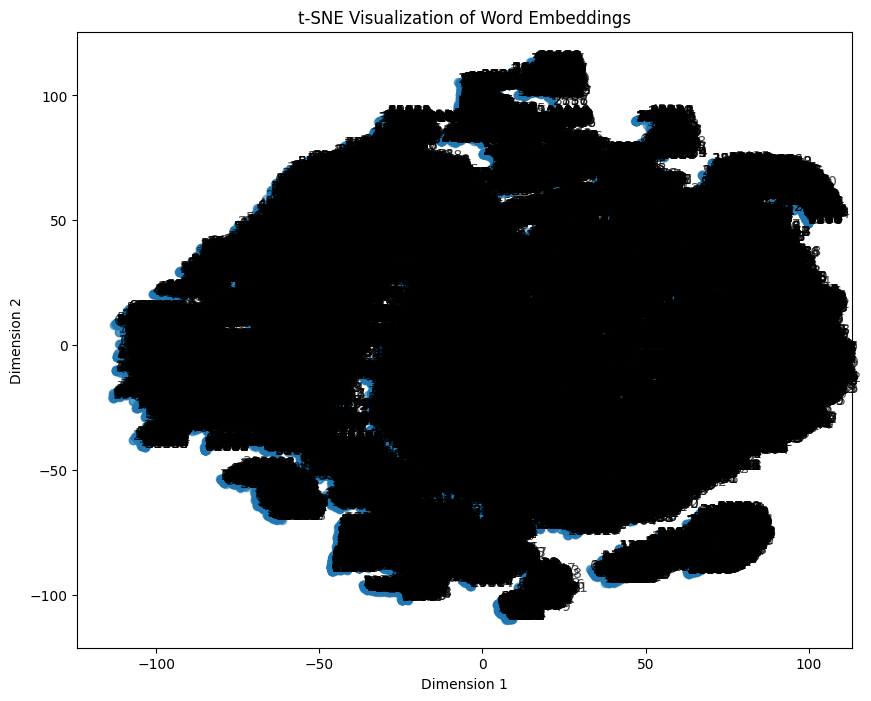

In [8]:
# Se obtienen los vectores de palabras del modelo Word2Vec
word_vectors = model.wv

# ExtrExtracción de las palabras y sus vectores
words = list(word_vectors.key_to_index.keys())
vectors = [word_vectors[word] for word in words]

# Redicción de la dimensionalidad de los vectores con t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(np.array(vectors))

# Se crea un DataFrame con las palabras y sus coordenadas 2D
tsne_df = pd.DataFrame(data=word_vectors_2d, columns=['Dim1', 'Dim2'])
tsne_df['Word'] = words

# Visualización de los embeddings en un gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], alpha=0.5)
for i, word in enumerate(tsne_df['Word']):
    plt.annotate(word, (tsne_df['Dim1'].iloc[i], tsne_df['Dim2'].iloc[i]), alpha=0.7)
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



Como se puede observar no se ve un detalle correspondiente, es por eso que se tomará mejor la siguiente opción.

### ***Función para crear visualizaciones con una cantidad determinada***

In [58]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))


    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

In [59]:
def generar_grafico_canciones(keys: list) -> None:
    """
    Función que genera cluster de canciones (con su respectivo título de canción) y clusterizando según las listas indicadas.

    Este cluster se realiza para hacer playlist a partir de las canciones indicadas
    """
    embedding_clusters = []
    word_clusters = []

    for word in keys:
        embeddings = []
        words = []
        for similar_word, _ in model.wv.most_similar(positive=str(word)):
            words.append(songs_df.iloc[int(similar_word)]['title'])
            embeddings.append(model.wv[similar_word])
        embedding_clusters.append(embeddings)#apending access vector of all similar words
        word_clusters.append(words)#appending list of all smiliar words
    
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape #geting the dimensions
    tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

    tsne_plot_similar_words(songs_df.iloc[keys]['title'], embeddings_en_2d, word_clusters)

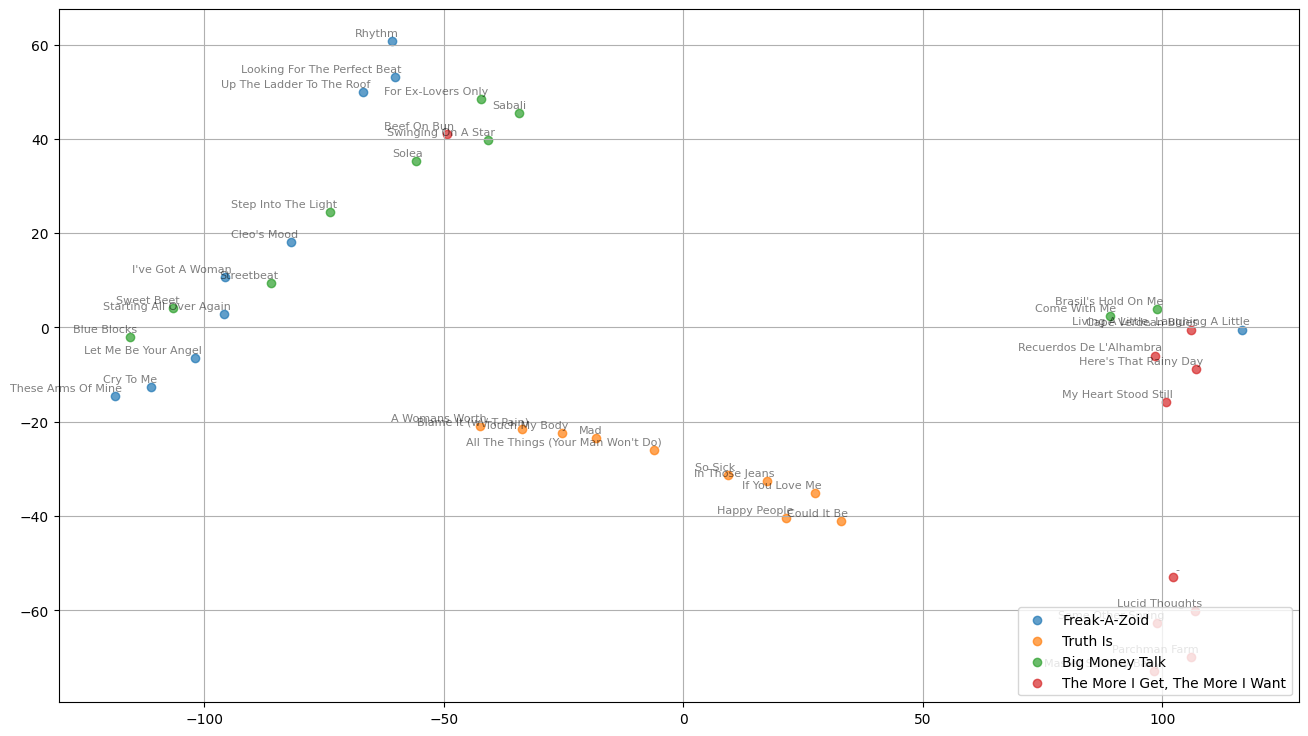

In [62]:
vector_ejemplo_1 = [12546, 200, 35785, 70123]
generar_grafico_canciones(vector_ejemplo_1)

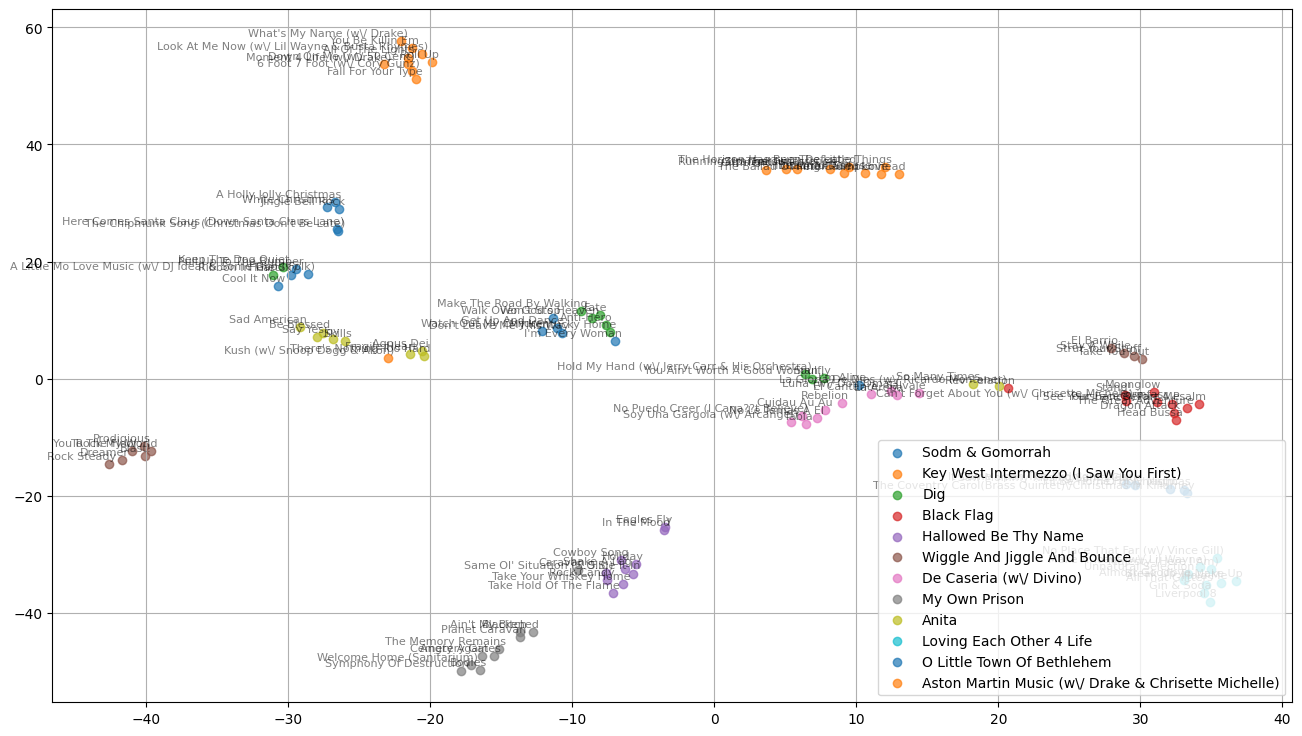

In [64]:
vector_ejemplo_2 = [37940, 22684, 22012, 38558, 11596, 32880, 58048, 6645, 35574, 51019, 54255, 1]
generar_grafico_canciones(vector_ejemplo_2)

Como se puede observar, a partir de la función generada se puede poner desde una única canción hasta n canciones posibles lo cual hace que sea más versatil generar este tipo de visualizaciones y como se puede observar genera los cluster de las canciones de la mejor manera.

# **CONCLUSIÓN**

El modelo Word2Vec es bastante flexible para poder encontrar relaciones entre canciones y poder mostrar en un plano bidimensional una representación gráfica de la relación entre las palabras.

Se aclara que el mejor modelo fue en el que se pusieron como parámetro la cantidad de canciones, esto con el fin de poder visualizar el dataset de la mejor manera ya que con todas las canciones no se puede apreciar la relación entre las mismas.